In [1]:
import os
import pandas as pd
import scipy.stats as ss
import numpy as np
from pycytominer import aggregate
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set data input folder
# download files described in README.md to this folder
data_input_folder = "inputs_data"

# set input folder
# download files described in README.md to this folder
image_input_folder = "inputs_images"

# set output folder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [3]:
# load barcodes used in experiment
guide_df = pd.read_csv('../common_files/Barcodes.csv')
# guides with other dialouts were not used in this experiment
guide_df = guide_df.query('dialout == 1 | dialout ==3')
guide_list = list(guide_df['sgRNA'])

In [4]:
# load hit lists from experiments
HeLa_DMEM_hitdf = pd.read_csv(os.path.join(data_input_folder, 'HeLa_DMEM_hits.csv'), usecols=['gene'])
HeLa_DMEM_hitdf['Screen_Hit'] = 'True'
HeLa_HPLM_hitdf = pd.read_csv(os.path.join(data_input_folder, 'HeLa_HPLM_hits.csv'), usecols=['gene'])
HeLa_HPLM_hitdf['Screen_Hit'] = 'True'
A549_hitdf = pd.read_csv(os.path.join(data_input_folder, 'A549_hits.csv'), usecols=['gene'])
A549_hitdf['Screen_Hit'] = 'True'

# Create aggregated databases

## HeLa

In [ ]:
# aggregation may be too computationally intensive for a standard personal computer
# skip aggregation by downloading aggregated files following instructions in README.md

# load normalized plate_level profiles, remove ghost guides, and merge 
DMEM_plates = ['CP257A','CP257B','CP257D','CP257F','CP257H']
HPLM_plates = ['CP257J','CP257K','CP257L','CP257N']

DMEM_list = []
for plate in DMEM_plates:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_DMEM_df = pd.read_csv(os.path.join(data_input_folder, filename))
    pre_DMEM_df = pre_DMEM_df[pre_DMEM_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    DMEM_list.append(pre_DMEM_df)

HeLa_DMEM_df = pd.concat(DMEM_list)

HPLM_list = []
for plate in HPLM_plates:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_HPLM_df = pd.read_csv(os.path.join(data_input_folder, filename))
    pre_HPLM_df = pre_HPLM_df[pre_HPLM_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    HPLM_list.append(pre_HPLM_df)

HeLa_HPLM_df = pd.concat(HPLM_list)

HeLa_DMEM_df.head()

In [ ]:
# perform median aggregation on profiles
HeLa_DMEM_df = aggregate(
            population_df=HeLa_DMEM_df, 
            strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode'], 
            features='infer', 
            operation='median' 
            )

HeLa_HPLM_df = aggregate(
            population_df=HeLa_HPLM_df, 
            strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode'], 
            features='infer', 
            operation='median' 
            )
            
HeLa_DMEM_df.to_csv(os.path.join(data_input_folder,'20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___DMEM___ALLWELLS.csv', index=False))
HeLa_HPLM_df.to_csv(os.path.join(data_input_folder,'20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___HPLM___ALLWELLS.csv', index=False))
HeLa_DMEM_df.head()

## A549

In [ ]:
# load normalized plate_level profiles, remove ghost guides, and merge 
plates = ['CP186','CP186B','CP186C','CP186D','CP186E','CP186F','CP186G','CP186H','CP186N']

A549_list = []
for plate in plates:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_df = pd.read_csv(os.path.join(data_input_folder, filename))
    pre_df = pre_df[pre_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    A549_list.append(pre_df)

A549_df = pd.concat(A549_list)
A549_df.head()

In [ ]:
# perform median aggregation on profiles
A549_df= aggregate(
            population_df=A549_df, 
            strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode','Metadata_Foci_Barcode_MatchedTo_Barcode'], 
            features='infer', 
            operation='median' 
            )

A549_df.to_csv(os.path.join(data_input_folder,'20200805_A549_WG_Screen_guide_normalized_median_merged_ALLBATCHES_ALLWELLS', index=False))
A549_df.head()

# ConA Granularity

In [5]:
# load aggregated files if not running notebook straight through
# you can skip this loading if you have just created the aggregated database in previous cells
keepcols = ['Cells_Granularity_2_ConA','Cells_Granularity_1_ConA','Cells_Granularity_4_ConA',
                'Cells_Granularity_3_ConA','Metadata_Foci_Barcode_MatchedTo_GeneCode',
                'Cells_Granularity_5_ConA','Cells_Granularity_7_ConA',
                'Cells_Granularity_6_ConA', 'Cells_Granularity_8_ConA']

HeLa_HPLM_ConA_df = pd.read_csv(os.path.join(data_input_folder, '20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___HPLM___ALLWELLS.csv'), usecols=keepcols)
HeLa_DMEM_ConA_df = pd.read_csv(os.path.join(data_input_folder, '20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___DMEM___ALLWELLS.csv'), usecols=keepcols)
A549_ConA_df = pd.read_csv(os.path.join(data_input_folder, '20200805_A549_WG_Screen_guide_normalized_median_merged_ALLBATCHES_ALLWELLS.csv'),usecols=keepcols)


In [ ]:
# if you have the aggregated files in memory, start here
# if you loaded them in the previous cell, skip this cell

keepcols = ['Cells_Granularity_2_ConA','Cells_Granularity_1_ConA','Cells_Granularity_4_ConA',
                'Cells_Granularity_3_ConA','Metadata_Foci_Barcode_MatchedTo_GeneCode',
                'Cells_Granularity_5_ConA','Cells_Granularity_7_ConA',
                'Cells_Granularity_6_ConA', 'Cells_Granularity_8_ConA']

HeLa_HPLM_ConA_df = HeLa_HPLM_df[[keepcols]]
HeLa_DMEM_ConA_df = HeLa_DMEM_df[[keepcols]]
A549_ConA_df = A549_df[[keepcols]]

In [6]:
GPI = ['PIGA', 'PIGC', 'PIGH', 'PIGP', 'PIGQ', 'PIGY', 'DPM2', 'PIGL', 'PIGM', 'PIGN', 'PIGB', 'PIGF', 'PIGO', 'PIGV', 'PIGW', 'PIGX', 'DPM1', 'DPM3', 'MPDU1','PIGK', 'PIGS', 'PIGT', 'PIGU', 'GPAA1']
Nglycan_ER = ['ALG10','DPM1','DPM2','DPM3','ALG3','ALG9','ALG12','ALG6','ALG8','ALG10B','DDOST','RPN1','RPN2','STT3A',
              'DAD1','TUSC3', 'MOGS','GANAB','MAN1A1','MAN1A2','MAN1B1','MAN1C1','STT3B',]
Nglycan_Golgi = ['MAN2A1','MAN2A2','MGAT1','MGAT2','MGAT3','MGAT4A','MGAT4B','MGAT4C','MGAT5','B4GALT1','B4GALT2',
                 'B4GALT3','B4GALT5','FUT8','ST6GAL1','ST6GAL2',]
Nglycan_Cyto = ['MAN2C1','ENGASE','FDPS','GGPS1','NEU2','NEU4','ALG5','DHDDS','DOLPP1','DOLK',
            'DPAGT1','ALG1','ALG2','ALG11','ALG13','ALG14',]
Nglycan_Lyso = ['AGA','FUCA1','FUCA2','HEXA','HEXB','HEXDC','CTSA','GALNS','GLB1','MAN2B1','MAN2B2','MANBA','NEU1','NEU3',]

genelist = GPI + Nglycan_Cyto + Nglycan_ER + Nglycan_Golgi + Nglycan_Lyso + ['nontargeting']

HeLa_HPLM_ConA_df = HeLa_HPLM_ConA_df[HeLa_HPLM_ConA_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_HPLM_ConA_meandf = HeLa_HPLM_ConA_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

HeLa_DMEM_ConA_df = HeLa_DMEM_ConA_df[HeLa_DMEM_ConA_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_DMEM_ConA_meandf = HeLa_DMEM_ConA_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

A549_ConA_df = A549_ConA_df[A549_ConA_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
A549_ConA_meandf = A549_ConA_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

for meandf in [HeLa_HPLM_ConA_meandf, HeLa_DMEM_ConA_meandf, A549_ConA_meandf]:
    for row in meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
        if row in GPI:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'GPI'
        if row in Nglycan_ER:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_ER'
        if row in Nglycan_Golgi:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_Golgi'
        if row in Nglycan_Cyto:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_Cyto'
        if row in Nglycan_Lyso:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Path'] = 'Nglycan_Lyso'
    meandf = meandf.astype({'Path': 'category','Metadata_Foci_Barcode_MatchedTo_GeneCode': 'category'})
    #meandf.to_csv(os.path.join(output_folder,f'{meandf}.csv', index=False))

HeLa_DMEM_ConA_meandf.head()

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Cells_Granularity_1_ConA,Cells_Granularity_2_ConA,Cells_Granularity_3_ConA,Cells_Granularity_4_ConA,Cells_Granularity_5_ConA,Cells_Granularity_6_ConA,Cells_Granularity_7_ConA,Cells_Granularity_8_ConA,Path
0,AGA,-0.177880,0.192649,0.102555,0.118127,0.020682,-0.468880,-0.644047,-0.500135,Nglycan_Lyso
1,ALG1,0.908293,-1.705200,-0.782395,-0.947021,-0.908688,-0.627460,-0.399456,-0.447031,Nglycan_Cyto
2,ALG10,-0.127121,-0.014908,-0.051447,0.149752,-0.182835,0.163243,0.211677,-0.517323,Nglycan_ER
3,ALG10B,0.476532,-0.329120,0.117172,-0.294506,-0.526057,-0.403465,-0.484762,-0.478492,Nglycan_ER
4,ALG11,0.088880,-0.992912,-0.393255,-0.564643,-0.805150,-0.312825,-0.012812,0.175980,Nglycan_Cyto


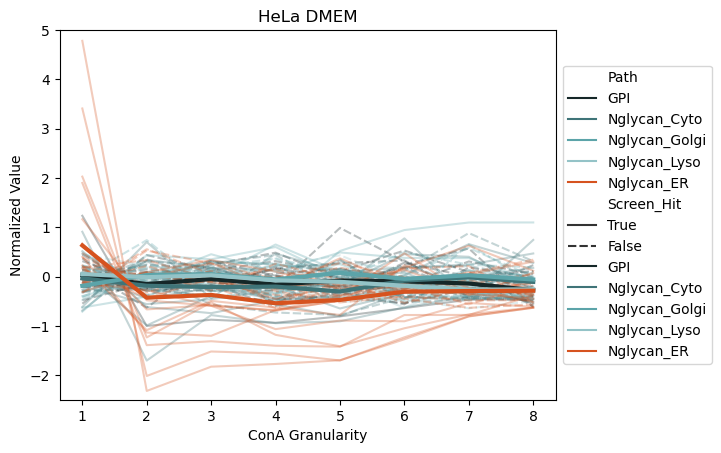

In [21]:
ecdfdf = HeLa_DMEM_ConA_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Path'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
ecdfdf = ecdfdf.merge(HeLa_DMEM_hitdf, how='left', right_on='gene', left_on='Metadata_Foci_Barcode_MatchedTo_GeneCode')
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Path", hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Path", errorbar=None, linewidth=3,
                 hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 data=ecdfdf)

g.set_xlabel("ConA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-2.5,5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa DMEM')
plt.savefig(os.path.join(output_folder,'HeLa_DMEM_ConA.png'), dpi=1200)
plt.show()

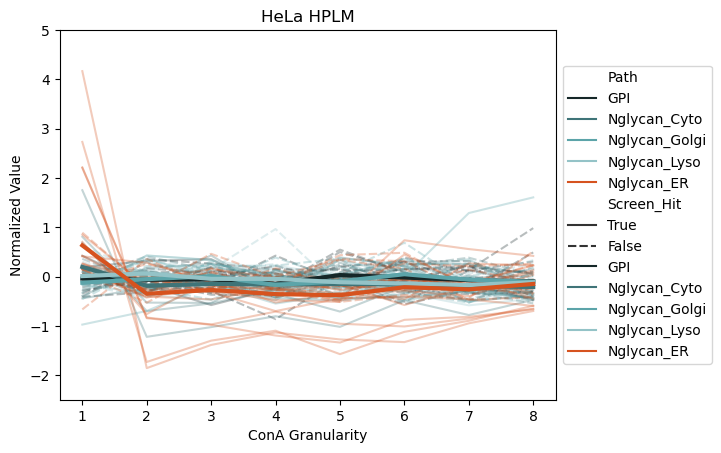

In [22]:
ecdfdf = HeLa_HPLM_ConA_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Path'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
ecdfdf = ecdfdf.merge(HeLa_DMEM_hitdf, how='left', right_on='gene', left_on='Metadata_Foci_Barcode_MatchedTo_GeneCode')
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Path", hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Path", errorbar=None, linewidth=3,
                 hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 data=ecdfdf)

g.set_xlabel("ConA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-2.5,5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa HPLM')
plt.savefig(os.path.join(output_folder,'HeLa_HPLM_ConA.png'), dpi=1200)
plt.show()

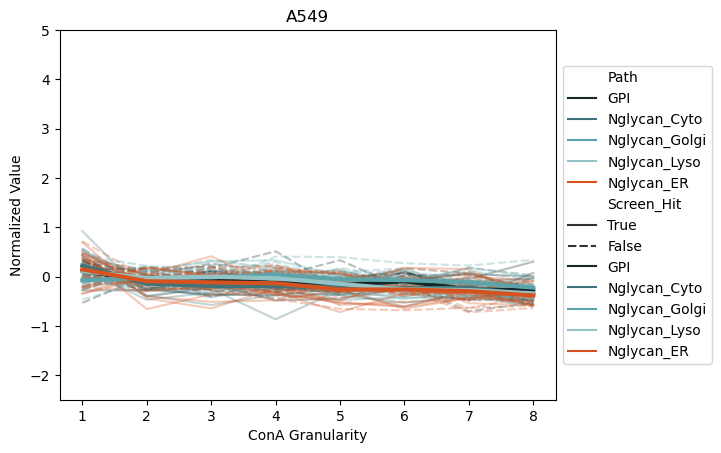

In [9]:
ecdfdf = A549_ConA_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Path'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
ecdfdf = ecdfdf.merge(A549_hitdf, how='left', right_on='gene', left_on='Metadata_Foci_Barcode_MatchedTo_GeneCode')
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Path", hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Path", errorbar=None, linewidth=3,
                 hue_order=['GPI','Nglycan_Cyto','Nglycan_Golgi','Nglycan_Lyso','Nglycan_ER'], 
                 palette=["#152728","#3f7478","#5ca4a9","#94c3c7","#d6531f"],
                 data=ecdfdf)

g.set_xlabel("ConA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-2.5,5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('A549')
plt.savefig(os.path.join(output_folder,'A549_ConA.png'), dpi=1200)
plt.show()

# WGA Granularity

In [10]:
# load aggregated files if not running notebook straight through
# you can skip this loading if you have just created the aggregated database in previous cells

keepcols = ['Cells_Granularity_2_WGA','Cells_Granularity_1_WGA','Cells_Granularity_4_WGA',
                'Cells_Granularity_3_WGA','Metadata_Foci_Barcode_MatchedTo_GeneCode',
                'Cells_Granularity_5_WGA','Cells_Granularity_6_WGA',
                'Cells_Granularity_7_WGA', 'Cells_Granularity_8_WGA']

HeLa_HPLM_WGA_df = pd.read_csv(os.path.join(data_input_folder, '20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___HPLM___ALLWELLS.csv'), usecols=keepcols)
HeLa_DMEM_WGA_df = pd.read_csv(os.path.join(data_input_folder, '20210422_6W_CP257_guide_normalized_median_merged_ALLBATCHES___DMEM___ALLWELLS.csv'), usecols=keepcols)
A549_WGA_df = pd.read_csv(os.path.join(data_input_folder, '20200805_A549_WG_Screen_guide_normalized_median_merged_ALLBATCHES_ALLWELLS.csv'),usecols=keepcols)


In [ ]:
# if you have the aggregated files in memory, start here
# if you loaded them in the previous cell, skip this cell

keepcols = ['Cells_Granularity_2_WGA','Cells_Granularity_1_WGA','Cells_Granularity_4_WGA',
                'Cells_Granularity_3_WGA','Metadata_Foci_Barcode_MatchedTo_GeneCode',
                'Cells_Granularity_5_WGA','Cells_Granularity_6_WGA',
                'Cells_Granularity_7_WGA', 'Cells_Granularity_8_WGA']
HeLa_HPLM_WGA_df = HeLa_HPLM_df[[keepcols]]
HeLa_DMEM_WGA_df = HeLa_DMEM_df[[keepcols]]
A549_WGA_df = A549_df[[keepcols]]

In [11]:
V1 = ['ATP6V1A', 'ATP6V1B1', 'ATP6V1B2', 'ATP6V1C1', 'ATP6V1C2', 'ATP6V1D', 'ATP6V1E1', 'ATP6V1E2', 
        'ATP6V1G1', 'ATP6V1G2', 'ATP6V1G3', 'ATP6V1F', 'ATP6V1H']
V0 = ['ATP6V0A1', 'ATP6V0A2', 'ATP6V0A4', 'ATP6V0B', 'ATP6V0C', 'ATP6V0D1', 'ATP6V0D2', 
      'ATP6V0E1', 'ATP6V0E2', 'ATP6AP1', 'ATP6AP2', 'RNASEK', 'ATP6V0A3','TCIRG1']
# RNASEK = ATP6V0A3
Assembly = ['ALDOB', 'CCDC115', 'VMA21', 'TMEM199', 'TM9SF4']

genelist = V1 + V0 + Assembly + ['nontargeting']

HeLa_HPLM_WGA_df = HeLa_HPLM_WGA_df[HeLa_HPLM_WGA_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_HPLM_WGA_meandf = HeLa_HPLM_WGA_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

HeLa_DMEM_WGA_df = HeLa_DMEM_WGA_df[HeLa_DMEM_WGA_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
HeLa_DMEM_WGA_meandf = HeLa_DMEM_WGA_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

A549_WGA_df = A549_WGA_df[A549_WGA_df['Metadata_Foci_Barcode_MatchedTo_GeneCode'].isin(genelist)]
A549_WGA_meandf = A549_WGA_df.groupby(['Metadata_Foci_Barcode_MatchedTo_GeneCode']).mean().reset_index()

for meandf in [HeLa_HPLM_WGA_meandf, HeLa_DMEM_WGA_meandf, A549_WGA_meandf]:
    for row in meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']:
        if row in V0:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'V0'
        if row in V1:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'V1'
        if row in Assembly:
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'Assembly'
        if row == 'nontargeting':
            meandf.at[meandf['Metadata_Foci_Barcode_MatchedTo_GeneCode']==row, 'Subunit'] = 'control'

meandf.head()

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Cells_Granularity_1_WGA,Cells_Granularity_2_WGA,Cells_Granularity_3_WGA,Cells_Granularity_4_WGA,Cells_Granularity_5_WGA,Cells_Granularity_6_WGA,Cells_Granularity_7_WGA,Cells_Granularity_8_WGA,Subunit
0,ALDOB,0.199363,-0.052662,0.052672,0.172550,-0.335372,-0.262594,-0.071831,-0.207086,Assembly
1,ATP6AP1,-0.422187,0.337616,0.388660,0.471022,0.185810,0.528920,0.047117,-0.073129,V0
2,ATP6AP2,-0.140931,0.329205,0.662734,0.356403,0.253060,0.369164,0.197981,-0.111664,V0
3,ATP6V0A1,0.174734,-0.306640,-0.035919,-0.005261,-0.213439,-0.122075,-0.233501,-0.265184,V0
4,ATP6V0A2,0.220772,0.133423,-0.051625,-0.162935,-0.265928,-0.471733,-0.081145,-0.318218,V0


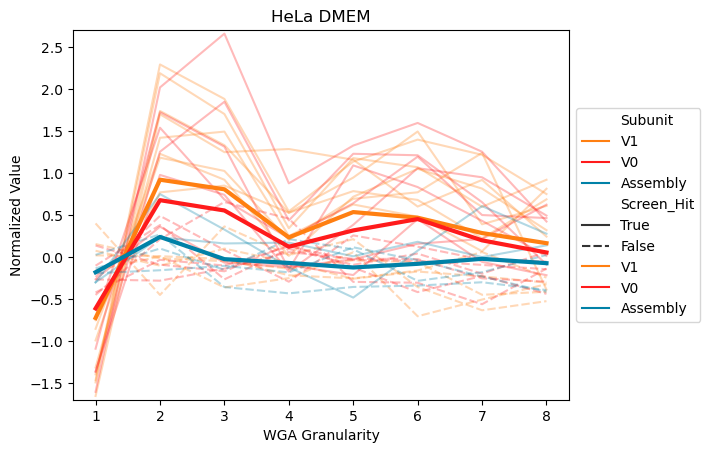

In [23]:
ecdfdf = HeLa_DMEM_WGA_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Subunit'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
ecdfdf = ecdfdf.merge(HeLa_DMEM_hitdf, how='left', right_on='gene', left_on='Metadata_Foci_Barcode_MatchedTo_GeneCode')
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value",
                 hue="Subunit", hue_order=['V1','V0','Assembly'], 
                 palette=["#ff7f11","#ff1b1c","#0081a7"], alpha=.3,
                 style='Screen_Hit', style_order=['True', 'False'],
                 units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None, 
                 data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Subunit", errorbar=None, linewidth=3,
                 hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 data=ecdfdf)
g.set_xlabel("WGA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-1.7,2.7))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa DMEM')
plt.savefig(os.path.join(output_folder,'HeLa_DMEM_WGA.png'), dpi=1200)
plt.show()

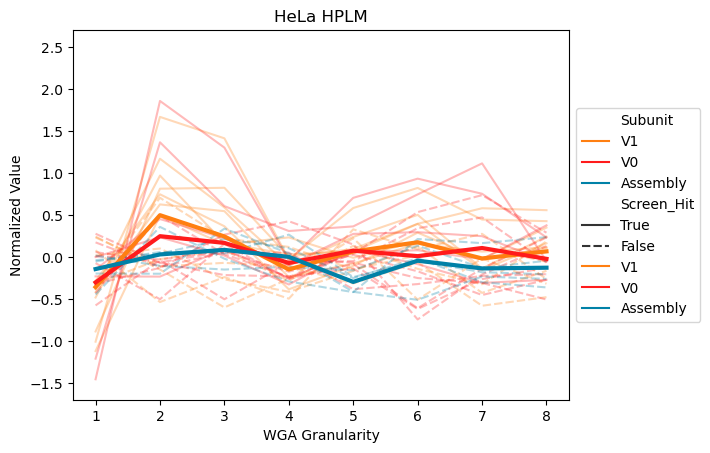

In [24]:
ecdfdf = HeLa_HPLM_WGA_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Subunit'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
ecdfdf = ecdfdf.merge(HeLa_HPLM_hitdf, how='left', right_on='gene', left_on='Metadata_Foci_Barcode_MatchedTo_GeneCode')
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Subunit", hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 style='Screen_Hit', style_order=['True', 'False'],units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Subunit", errorbar=None, linewidth=3,
                 hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 data=ecdfdf)

g.set_xlabel("WGA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-1.7,2.7))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('HeLa HPLM')
plt.savefig(os.path.join(output_folder,'HeLa_HPLM_WGA.png'), dpi=1200)
plt.show()

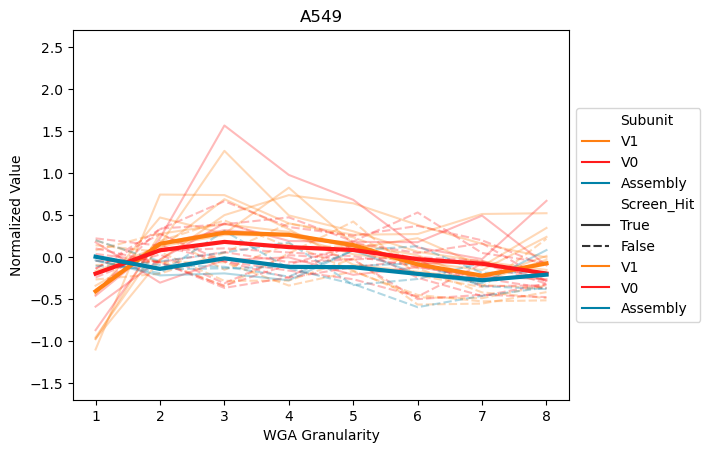

In [25]:
ecdfdf = A549_WGA_meandf.melt(id_vars=['Metadata_Foci_Barcode_MatchedTo_GeneCode', 'Subunit'])
ecdfdf['variable'] = ecdfdf['variable'].str.split('_').str[2]
ecdfdf = ecdfdf.merge(A549_hitdf, how='left', right_on='gene', left_on='Metadata_Foci_Barcode_MatchedTo_GeneCode')
ecdfdf['Screen_Hit'] = ecdfdf['Screen_Hit'].fillna('False')

plt.clf()
g = sns.lineplot(x="variable", y="value", alpha=.3,
                 hue="Subunit", hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 style='Screen_Hit', style_order=['True', 'False'], units='Metadata_Foci_Barcode_MatchedTo_GeneCode', estimator=None,data=ecdfdf)
sns.lineplot(x="variable", y="value", hue="Subunit", errorbar=None, linewidth=3,
                 hue_order=['V1','V0','Assembly'], palette=["#ff7f11","#ff1b1c","#0081a7"],
                 data=ecdfdf)

g.set_xlabel("WGA Granularity")
g.set_ylabel("Normalized Value")
g.set(ylim=(-1.7,2.7))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.set_title('A549')
plt.savefig(os.path.join(output_folder,'A549_WGA.png'), dpi=1200)
plt.show()

# Visualize Granularity

In [15]:
%matplotlib inline
import numpy
import skimage
import skimage.morphology 
import scipy
import matplotlib.pyplot as plt
from imageio import imread
import os

In [16]:
# subfactor = "Subsampling factor for granularity measurements"
# samp_size = "Subsampling factor for background reduction"
# radius = "Radius of structuring element"
# eros = "Range of the granular spectrum"

def show_granularity_result(figname, pixels,subfactor,samp_size,radius,eros, viewscale=1, outputseparate=False):
    # Rescale image 
    orig = pixels.copy()
    
    new_shape = numpy.array(pixels.shape)
    new_shape = new_shape * subfactor
    i, j = (
        numpy.mgrid[0 : new_shape[0], 0 : new_shape[1]].astype(float)
        / subfactor
    )
    pixels = scipy.ndimage.map_coordinates(pixels, (i, j), order=1)

    mask = numpy.ones_like(pixels)
    prepixels = pixels.copy()
    
    # Do initial processing based on radius
    back_shape = new_shape * samp_size
    i, j = (
        numpy.mgrid[0 : back_shape[0], 0 : back_shape[1]].astype(float)
        / samp_size
    )
    back_pixels = scipy.ndimage.map_coordinates(pixels, (i, j), order=1)
    back_mask = (
        scipy.ndimage.map_coordinates(mask.astype(float), (i, j)) > 0.9
    )

    # "Radius of structuring element"
    selem = skimage.morphology.disk(radius, dtype=bool)
    back_pixels_mask = numpy.zeros_like(back_pixels)
    back_pixels_mask[back_mask == True] = back_pixels[back_mask == True]
    back_pixels = skimage.morphology.erosion(back_pixels_mask, footprint=selem)
    back_pixels_mask = numpy.zeros_like(back_pixels)
    back_pixels_mask[back_mask == True] = back_pixels[back_mask == True]
    back_pixels = skimage.morphology.dilation(back_pixels_mask, footprint=selem)
    i, j = numpy.mgrid[0 : new_shape[0], 0 : new_shape[1]].astype(float)
    #
    # Make sure the mapping only references the index range of
    # back_pixels.
    #
    i *= float(back_shape[0] - 1) / float(new_shape[0] - 1)
    j *= float(back_shape[1] - 1) / float(new_shape[1] - 1)
    back_pixels = scipy.ndimage.map_coordinates(
        back_pixels, (i, j), order=1
    )
    pixels -= back_pixels
    pixels[pixels < 0] = 0
    
    ero = pixels.copy()

    footprint = skimage.morphology.disk(1, dtype=bool)

    plt.clf()
    fig, axes = plt.subplots(ncols=eros+2, figsize=(16,8))
    ax = axes.ravel()
    ax[0].imshow(orig,cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')
    
    ax[1].imshow(pixels,cmap='gray')
    ax[1].set_title('Downscaled')
    ax[1].axis('off')


    for count in range(0,eros):
        prev_ero = ero
        count +=1
        ero_mask = numpy.zeros_like(ero)
        ero_mask[mask == True] = ero[mask == True]
        ero = skimage.morphology.erosion(ero_mask, footprint=footprint)
        # show what has been eroded
        ax[count+1].imshow(prev_ero - ero,cmap='gray',vmax=pixels.max()*viewscale, vmin=0)
        ax[count+1].set_title(f'Granularity {count}')
        ax[count+1].axis('off')
        if outputseparate:
            skimage.io.imsave(os.path.join(output_folder, f'{figname}_ero_{count}.tif'), ero)
    
    plt.savefig(os.path.join(output_folder, figname), dpi=1200)

/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


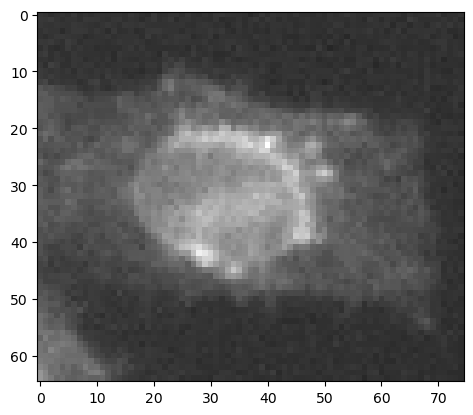

In [17]:
image = imread(os.path.join(image_input_folder,'CorrWGA_Site_17_sc1.tif'))
image = skimage.util.img_as_float(image)
pixels = image.copy()

plt.imshow(image, cmap='gray', vmax=pixels.max(), vmin=0)
plt.show()

/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/WGA_granularity_ero_1.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/WGA_granularity_ero_2.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/WGA_granularity_ero_3.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/WGA_granularity_ero_4.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/WGA_granularity_ero_5.tif is a low contrast image


<Figure size 640x480 with 0 Axes>

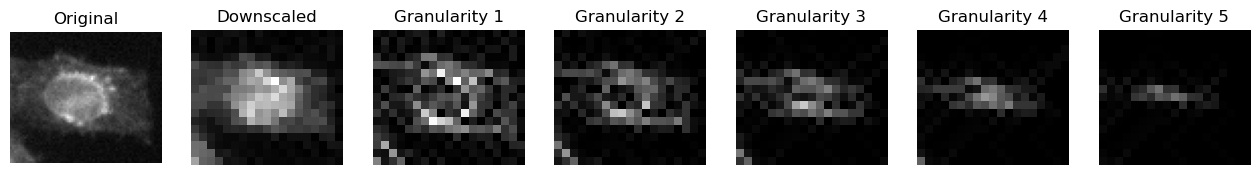

In [18]:
show_granularity_result('WGA_granularity', pixels,.25,.25,10,5, viewscale=.5, outputseparate=True)

# ER

/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


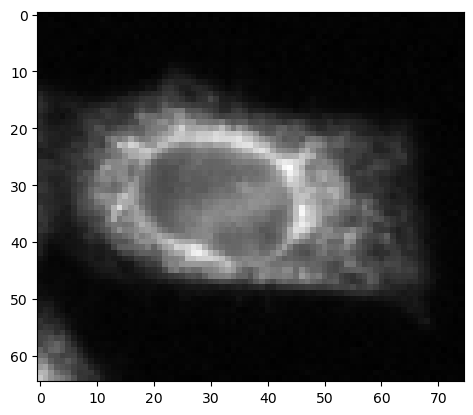

In [19]:
image = imread(os.path.join(image_input_folder,'CorrER_Site_17_sc1.tif'))
image = skimage.util.img_as_float(image)
pixels = image.copy()

plt.imshow(image, cmap='gray')
plt.show()

/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/ER_Granularity_ero_1.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/ER_Granularity_ero_2.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/ER_Granularity_ero_3.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/ER_Granularity_ero_4.tif is a low contrast image
/Users/eweisbar/miniconda3/envs/periscope_2022/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: outputs/ER_Granularity_ero_5.tif is a low contrast image


<Figure size 640x480 with 0 Axes>

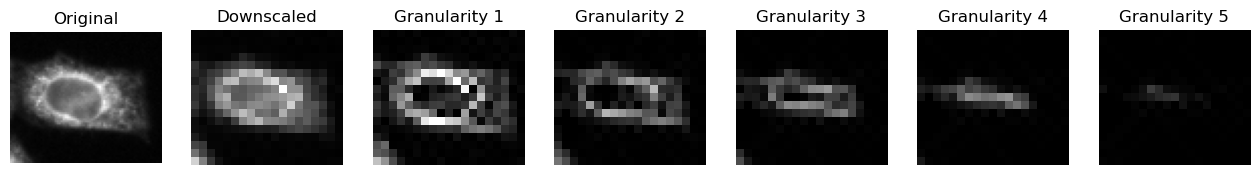

In [20]:
show_granularity_result('ER_Granularity', pixels,.25,.25,10,5, viewscale=.5, outputseparate=True)